In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent
humidity = ctrl.Antecedent(np.arange(0, 101, 0.11), "humidity")
lightlevel = ctrl.Antecedent(np.arange(0, 101, 1), "lightlevel")
temperature = ctrl.Antecedent(np.arange(0, 41, 1), "temperature")
comfortable = ctrl.Consequent(np.arange(0, 11, 1), "comfortable")

# Define membership function
humidity["low"] = fuzz.trapmf(humidity.universe, [0, 0, 25, 60])
humidity["normal"] = fuzz.trapmf(humidity.universe, [25, 40, 60, 75])
humidity["High"] = fuzz.trapmf(humidity.universe, [40, 75, 100, 100])
lightlevel["dark"] = fuzz.trapmf(lightlevel.universe, [0, 0, 25, 50])
lightlevel["normal"] = fuzz.trapmf(lightlevel.universe, [25, 40, 60, 75])
lightlevel["bright"] = fuzz.trapmf(lightlevel.universe, [60, 80, 100, 100])
temperature["cold"] = fuzz.trapmf(temperature.universe, [0, 0, 16, 24])
temperature["normal"] = fuzz.trapmf(temperature.universe, [16, 22, 27, 30])
temperature["hot"] = fuzz.trapmf(temperature.universe, [25, 30, 40, 40])
comfortable["uncomfortable"] = fuzz.trapmf(comfortable.universe, [0, 0, 2, 4])
comfortable["soso"] = fuzz.trapmf(comfortable.universe, [2, 4, 6, 8])
comfortable["comfortable"] = fuzz.trapmf(comfortable.universe, [6, 8, 10, 10])

c:\Users\MrChe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


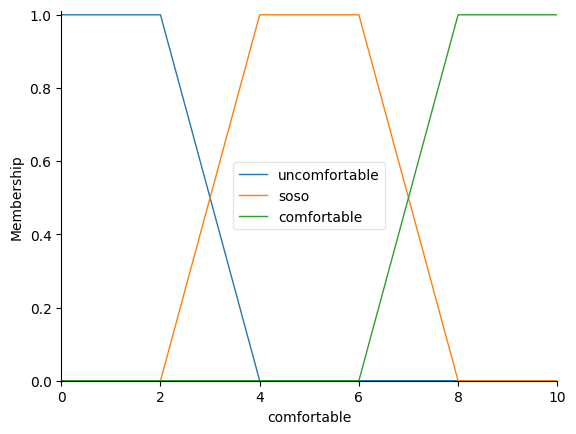

In [3]:
# To help understand what the membership looks like, use the ``view`` methods.
# lightlevel.view()
comfortable.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

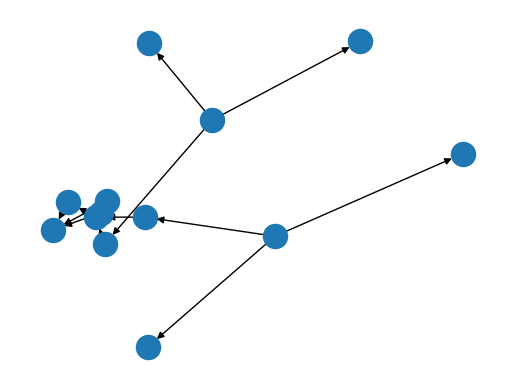

In [4]:
rule1 = ctrl.Rule(temperature["normal"] | humidity["low"], comfortable["comfortable"])
rule2 = ctrl.Rule(temperature["hot"] | humidity["High"], comfortable["uncomfortable"])
rule3 = ctrl.Rule(
    temperature["cold"] | lightlevel["bright"], comfortable["comfortable"]
)
rule4 = ctrl.Rule(
    temperature["hot"] | lightlevel["bright"], comfortable["uncomfortable"]
)

rule3.view()

In [5]:
comfortCtrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
comfortSim = ctrl.ControlSystemSimulation(comfortCtrl)

In [6]:
comfortSim.input["humidity"] = 23
comfortSim.input["temperature"] = 20
comfortSim.input["lightlevel"] = 30
# Crunch the numbers
comfortSim.compute()

8.444444444444445


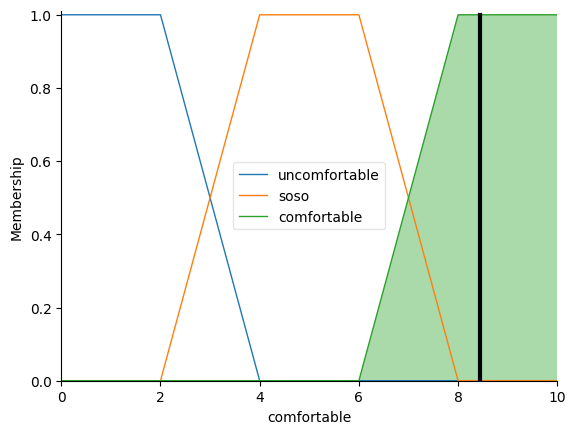

In [7]:
print(comfortSim.output["comfortable"])
comfortable.view(sim=comfortSim)